## TESTING FOR A UNIT ROOT

In [1]:
# 导入需要的包
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.formula.api import ols
import statsmodels
from statsmodels.tsa.ar_model import AutoReg
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm



### Example 5.1

读入数据

In [16]:
data1=pd.read_csv("D:/anaconda3/envs/python36/TimeSeries/r20.csv")
data2=pd.read_csv("D:/anaconda3/envs/python36/TimeSeries/rs.csv")
data=data1['r20']-data2['rs']
rate=data.dropna(axis=0,how='all')

In [17]:
print('ADF检验统计量：',statsmodels.tsa.stattools.adfuller(rate,maxlag=2)[0])

ADF检验统计量： -4.019262627051042


ADF的检验统计量是-4.02<-3.44，因此在1%水平下显著。可以断定，该随机过程没有单位根，用AR(2) 拟合数据是合理的。

In [18]:
data=pd.read_csv("D:/anaconda3/envs/python36/TimeSeries/dollar.csv",skiprows=1)
dollar=data.dropna(axis=0,how='all')
w=data.diff().dropna(axis=0,how='all')
print('ADF检验统计量：',statsmodels.tsa.stattools.adfuller(dollar,maxlag=2)[0])
resultAR = AutoReg(dollar, 2).fit()
resultAR.summary()

ADF检验统计量： -2.9552033243159075


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                 2.3359   No. Observations:                10818
Model:                     AutoReg(2)   Log Likelihood               34238.577
Method:               Conditional MLE   S.D. of innovations              0.010
Date:                Thu, 06 Aug 2020   AIC                             -9.168
Time:                        17:21:27   BIC                             -9.166
Sample:                             2   HQIC                            -9.167
                                10818                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0020      0.001      2.831      0.005       0.001       0.003
2.3359.L1      1.0594      0.010    110.387      0.000       1.041       1.078
2.3359.L2     -0.0606      0.010     -6.321      0.000      -0.079      -0.042
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0013           +0.0000j            1.0013            0.0000
AR.2           16.4680           +0.0000j           16.4680            0.0000
-----------------------------------------------------------------------------
"""

ADF的检验统计量是-2.96>-3.43，在1%水平下不显著，但是在5%水平下显著。因此，该时间序列用AR过程建模可能并不合适，可能是随机游走过程。

### Example 5.2

在example 4.3中，全球气温被看作了是I(1)过程，但是有气象学上的假说认为应该是I(0)，因此有必要用单位根检验来确定差分的阶数。由于AR模型的阶数并不知道，因此这里根据5.8节的内容计算 $k=[2016^{0.25}]=6$，因此可以认为对应的AR过程是6阶，计算得出ADF检验统计量如下：

In [22]:
data=pd.read_csv("D:/anaconda3/envs/python36/TimeSeries/Global temperature.csv")
ts=data['value']
print('ADF检验统计量：',statsmodels.tsa.stattools.adfuller(ts,maxlag=6)[0])
print('ADF检验统计量的p值：',statsmodels.tsa.stattools.adfuller(ts,maxlag=6)[1])

ADF检验统计量： -3.4799782776305896
ADF检验统计量的p值： 0.008516431527854983


可以看出，ADF检验统计量为-3.48<-3.43，尽管在1%水平下显著，但是p值为0.009，很接近0.01。因此，这个全球温度序列实际上是否为I(1)过程，还存在一定的争议。

## TREND VERSUS DIFFERENCE STATIONARITY

### Example 5.3

读入数据，分别对原始数据和一阶差分数据作图查看

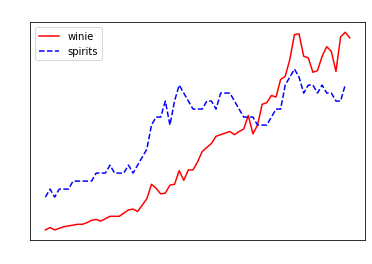

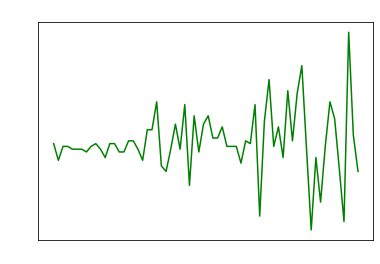

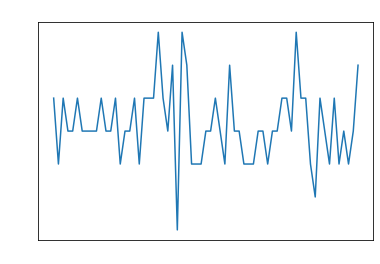

In [8]:
wine_spirits=pd.read_csv("D:/anaconda3/envs/python36/TimeSeries/wine-spirits.csv")
wine=wine_spirits['wine'].dropna(axis=0,how='all')
spirits=wine_spirits['spirits'].dropna(axis=0,how='all')
plt.plot(wine,'r',label="winie")
plt.plot(spirits,'b--',label="spirits")
plt.title("wine_spirits",color="white")
plt.tick_params(axis='x',colors='white')
plt.tick_params(axis='y',colors='white')
plt.legend()
plt.show()
wine_d=wine.diff().dropna()
spirits_d=spirits.diff().dropna()
plt.plot(wine_d,color='g')
plt.title("first order difference of wine",color="white")
plt.tick_params(axis='x',colors='white')
plt.tick_params(axis='y',colors='white')
plt.show()
plt.plot(spirits_d)
plt.title("first order difference of spirits",color="white")
plt.tick_params(axis='x',colors='white')
plt.tick_params(axis='y',colors='white')
plt.show()

可以看出，wine和spirits的数据是逐渐上升的，因此可能初步猜测是趋势稳定的；但是从一阶差分的图像可以看出，一阶差分几乎是稳定的，因此也可以猜测是差分稳定的。为了辩别该序列到底符合哪种模型，下面计算包含趋势的ADF回归过程如下：

In [56]:
wine_spirits['time']=range(1,len(wine)+1)
wine_spirits['wine_d']=wine_d
wine_spirits['spirits_d']=spirits_d
for i in range(len(wine_d)):
    wine_spirits['wine_d'][i]=wine_spirits['wine_d'][i+1]
    wine_spirits['spirits_d'][i]=wine_spirits['spirits_d'][i+1]
wine_spirits=wine_spirits.dropna()

wine_model = ols(formula='wine_d ~ time + wine ', data=wine_spirits)
wine_res = wine_model.fit()
print("wine 最小二乘法拟合结果如下：")
print(wine_res.summary())

spirits_model = ols(formula='spirits_d ~ time + spirits ', data=wine_spirits)
spirits_res = spirits_model.fit()
print("spirits 最小二乘法拟合结果如下：")
print(spirits_res.summary())

wine 最小二乘法拟合结果如下：
                            OLS Regression Results                            
Dep. Variable:                 wine_d   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     4.609
Date:                Fri, 07 Aug 2020   Prob (F-statistic):             0.0136
Time:                        21:11:30   Log-Likelihood:                 52.887
No. Observations:                  65   AIC:                            -99.77
Df Residuals:                      62   BIC:                            -93.25
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0488      0.035  

D:\anaconda3\envs\python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
D:\anaconda3\envs\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


因此，wine的差分平稳过程为：
$\triangledown x_t=-0.049+0.0092t-0.213x_{t-1}+\hat{a_t}$

spirits的差分平稳过程为：
$\triangledown x_t=0.112+0.0022t-0.121x_{t-1}+\hat{a_t}$

根据公式（5.2）计算τ统计量如下：

In [9]:
T1=len(wine)
phi_T=0
for i in range(1,T1):
    phi_T+=wine[i-1]*wine[i]
phi_T=phi_T/np.dot(wine,wine)
s_T2=0
for t in range(1,len(wine)):
    s_T2+=(wine[t]-phi_T*wine[t-1])**2
s_T2=s_T2/(T1-1)
denominator=0
for t in range(T1-1):
    denominator+=wine[t]*wine[t]
sigma_phi_T=(s_T2/denominator)**0.5
tau_miu=(phi_T-1)/sigma_phi_T
print("The τ statistic of wine is:",tau_miu)

The τ statistic of wine is: -2.3166044542269937


In [10]:
T2=len(spirits)
phi_T=0
for i in range(1,T2):
    phi_T+=spirits[i-1]*spirits[i]
phi_T=phi_T/np.dot(spirits,spirits)
s_T2=0
for t in range(1,len(spirits)):
    s_T2+=(spirits[t]-phi_T*spirits[t-1])**2
s_T2=s_T2/(T2-1)
denominator=0
for t in range(T2-1):
    denominator+=spirits[t]*spirits[t]
sigma_phi_T=(s_T2/denominator)**0.5
tau_miu=(phi_T-1)/sigma_phi_T
print("The τ statistic of spirits is:",tau_miu)

The τ statistic of spirits is: -1.637171345197753


由于wine和spirits的τ统计量分别为-2.31和-1.64，绝对值都显著小于3.17，因此它们都是差分稳定而不是趋势稳定。

### Example 5.4

读入数据，作图查看

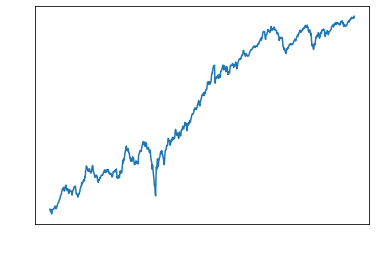

In [34]:
data=pd.read_csv("D:/anaconda3/envs/python36/TimeSeries/All Share.csv")
ts=np.log(data['value'])
plt.plot(ts)
plt.xlabel("time",color="white")
plt.ylabel("log of all share index",color="white")
plt.tick_params(axis='x',colors='white')
plt.tick_params(axis='y',colors='white')
plt.show()

In [11]:
T=len(ts)
phi_T=0
for i in range(1,T):
    phi_T+=ts[i-1]*ts[i]
phi_T=phi_T/np.dot(ts,ts)
s_T2=0
for t in range(1,T):
    s_T2+=(ts[t]-phi_T*ts[t-1])**2
s_T2=s_T2/(T-1)
denominator=0
for t in range(T-1):
    denominator+=ts[t]*ts[t]
sigma_phi_T=(s_T2/denominator)**0.5
tau_miu=(phi_T-1)/sigma_phi_T
print("The τ statistic of spirits is:",tau_miu)

The τ statistic of spirits is: -4.553702630987103


In [35]:
data['delta']=ts.diff()
data['delta2']=ts.diff()
data['time']=range(1,len(ts)+1)
data['lag_value']=data['value']
for i in range(1,len(ts)):
    data['delta'][i-1]=data['delta'][i]
    data['lag_value'][i-1]=data['value'][i]
for i in range(1,len(ts)-1):
    data['delta2'][i-1]=data['delta2'][i+1]
data=data.drop(labels=[790,791],axis=0)
share_model = ols(formula='delta2 ~ time + lag_value + delta ', data=data)
share_model = share_model.fit()
print("wine 最小二乘法拟合结果如下：")
print(share_model.summary())

D:\anaconda3\envs\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\anaconda3\envs\python36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\anaconda3\envs\python36\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


wine 最小二乘法拟合结果如下：
                            OLS Regression Results                            
Dep. Variable:                 delta2   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     5.045
Date:                Sat, 08 Aug 2020   Prob (F-statistic):            0.00182
Time:                        15:11:37   Log-Likelihood:                 1248.8
No. Observations:                 790   AIC:                            -2490.
Df Residuals:                     786   BIC:                            -2471.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0002      0.005  

### Example 5.5

读入数据

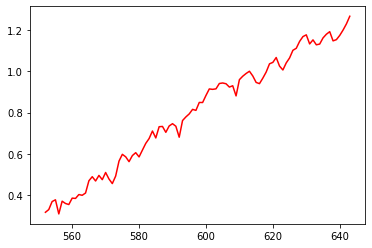

In [2]:
GDP=pd.read_csv("D:/anaconda3/envs/python36/TimeSeries/GDP.csv")
GDP=GDP.drop(labels=range(552),axis=0)
GDP_log=np.log(GDP['value'])
plt.plot(GDP_log,'r')
plt.show()

In [3]:
GDP['GDP_log']=GDP_log
GDP['lag_GDP_log']=GDP_log
GDP['time']=range(1,len(GDP_log)+1)
for i in range(552,642):
    GDP['lag_GDP_log'][i]=GDP['lag_GDP_log'][i+1]
GDP=GDP.drop(labels=[642,643],axis=0)

D:\anaconda3\envs\python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [71]:
GDP_model = ols(formula='GDP_log ~ time + lag_GDP_log  ', data=GDP)
GDP_model = GDP_model.fit()
print("GDP 最小二乘法拟合结果如下：")
print(GDP_model.summary())


GDP 最小二乘法拟合结果如下：
                            OLS Regression Results                            
Dep. Variable:                GDP_log   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     4487.
Date:                Sat, 08 Aug 2020   Prob (F-statistic):           1.71e-88
Time:                        16:00:48   Log-Likelihood:                 198.80
No. Observations:                  90   AIC:                            -391.6
Df Residuals:                      87   BIC:                            -384.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0886      0.026

写成模型（5.8）的形式就是$x_t=0.329+0.0103t+e_t$

$e_t=0.696e_{t-1}+\hat{a}_t$
由于我们处理的是取对数之后的数据，因此该模型表明，真实的GDP数据以每年1.03%的速度在增长，在趋势线上有一个平稳的波动。因此，所有使得真实GDP偏离长期趋势的干扰都是短期的，GDP最终都会回到原来的趋势线上。由于噪声部分符合AR(1)过程，且系数接近0.7，因此干扰是呈几何级数迅速下降的，在7年之后能够下降90%。

注意到误差项没有显示出任何的商业周期性，因此误差至少会符合含有复根的AR(2)模型，但是AR(2)过程的第二个系数并不显著，因此不采取此模型。

重新构建差分稳定模型如下：

In [7]:
resultAR = AutoReg(GDP_log, 1).fit()
resultAR.summary()


D:\anaconda3\envs\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  value   No. Observations:                   92
Model:                     AutoReg(1)   Log Likelihood                 193.648
Method:               Conditional MLE   S.D. of innovations              0.029
Date:                Sat, 08 Aug 2020   AIC                             -7.028
Time:                        17:12:04   BIC                             -6.945
Sample:                             1   HQIC                            -6.995
                                   92                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0155      0.009      1.675      0.094      -0.003       0.034
value.L1       0.9936      0.011     89.988      0.000       0.972       1.015
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0065           +0.0000j            1.0065            0.0000
-----------------------------------------------------------------------------
"""

这是一个带漂移的随机游走，漂移项是0.0115。此处的截距是一个能够影响整个时间序列的干扰，而不会像上一个模型那样随着时间衰减。这个序列也不会像上一个那样返回到一条特定的趋势线上，而是每一个时间点都会重新产生干扰。

那么到底干扰项会长久地影响GDP？还是仅仅会短暂地影响它，最终回到长期趋势上来？我们需要计算含趋势的ADF回归过程，并计算检验统计量τ：

In [6]:
T=len(GDP_log)
phi_T=0
for i in range(553,552+T):
    phi_T+=GDP_log[i-1]*GDP_log[i]
phi_T=phi_T/np.dot(GDP_log,GDP_log)
s_T2=0
for t in range(553,552+T):
    s_T2+=(GDP_log[t]-phi_T*GDP_log[t-1])**2
s_T2=s_T2/(T-1)
denominator=0
for t in range(552,552+T-1):
    denominator+=GDP_log[t]*GDP_log[t]
sigma_phi_T=(s_T2/denominator)**0.5
tau_miu=(phi_T-1)/sigma_phi_T
print("The τ statistic of spirits is:",tau_miu)

The τ statistic of spirits is: -3.042302991492444


由于检验统计量为-3.04，因此该时间序列更符合趋势平稳过程。






